<a href="https://colab.research.google.com/github/Miguel-03/IA2025/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



In [3]:
# --- 2. Cargar dataset ---
# Si usas Google Colab, sube el archivo con:
# from google.colab import files
# uploaded = files.upload()

housing = pd.read_csv("housing.csv")

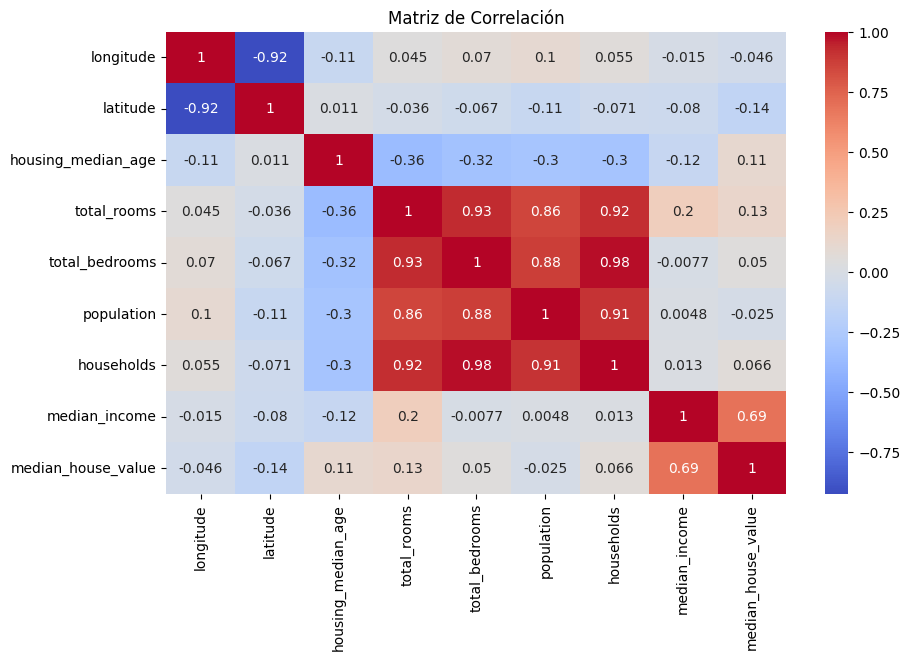

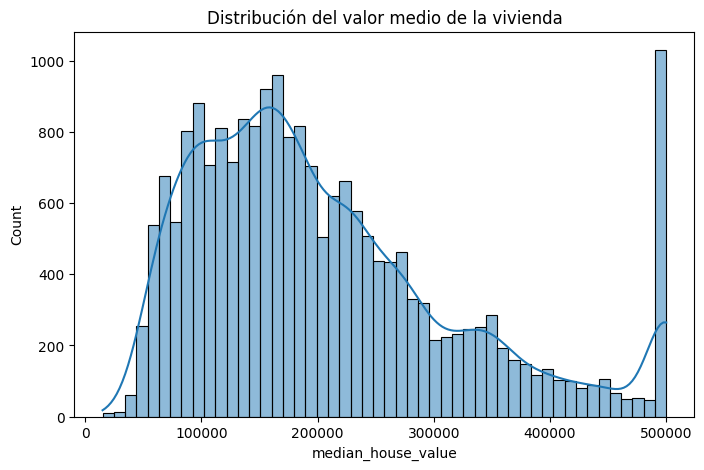

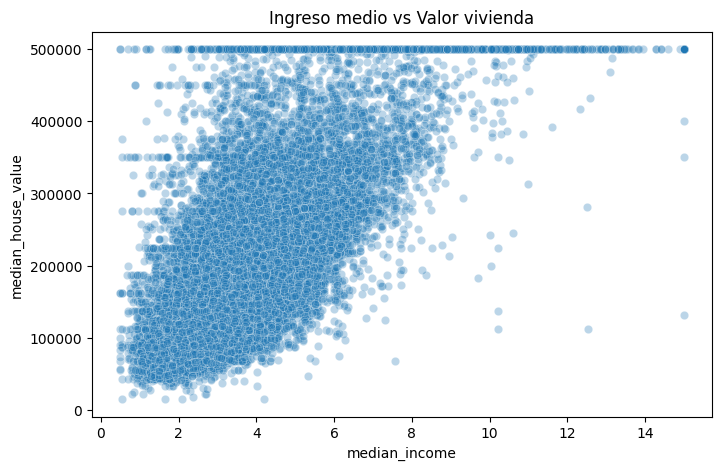

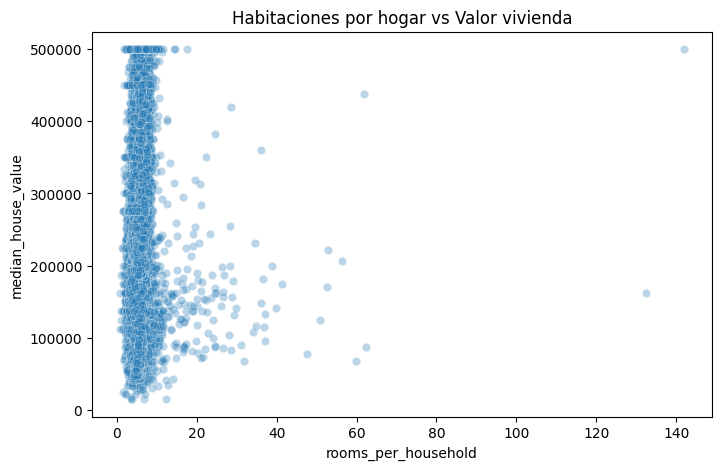

In [4]:
# --- 3. Exploratory Data Analysis (EDA) ---

# Correlación
plt.figure(figsize=(10,6))
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

# Distribución de precios
plt.figure(figsize=(8,5))
sns.histplot(housing["median_house_value"], bins=50, kde=True)
plt.title("Distribución del valor medio de la vivienda")
plt.show()

# Ingreso vs precio
plt.figure(figsize=(8,5))
sns.scatterplot(x="median_income", y="median_house_value", data=housing, alpha=0.3)
plt.title("Ingreso medio vs Valor vivienda")
plt.show()

# Crear rooms_per_household
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

plt.figure(figsize=(8,5))
sns.scatterplot(x="rooms_per_household", y="median_house_value", data=housing, alpha=0.3)
plt.title("Habitaciones por hogar vs Valor vivienda")
plt.show()

In [5]:
# --- 4. Modelos de Regresión Lineal Simples ---

features = ["longitude","latitude","housing_median_age","total_rooms",
            "total_bedrooms","population","households","median_income","rooms_per_household"]

results = []

for feature in features:
    X = housing[[feature]].dropna()
    y = housing.loc[X.index, "median_house_value"]

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    results.append({"Variable": feature, "R2": r2, "MAE": mae, "RMSE": rmse})

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print("Resultados de regresiones lineales simples:")
print(results_df)



Resultados de regresiones lineales simples:
              Variable        R2           MAE           RMSE
7        median_income  0.473447  62625.933791   83733.574526
8  rooms_per_household  0.023088  89617.854843  114052.930267
1             latitude  0.020782  90239.031014  114187.467563
3          total_rooms  0.017997  89931.675049  114349.740366
2   housing_median_age  0.011156  90620.511221  114747.336285
6           households  0.004335  90802.743243  115142.420092
4       total_bedrooms  0.002469  90976.962529  115290.268798
0            longitude  0.002113  90852.036070  115270.847481
5           population  0.000608  91153.820095  115357.758354


In [6]:
X_pred = np.array([[4]])  # 4 habitaciones por hogar
model_rooms = LinearRegression()
X = housing[["rooms_per_household"]].dropna()
y = housing.loc[X.index, "median_house_value"]
model_rooms.fit(X, y)

predicted_price = model_rooms.predict(X_pred)[0]
print(f"\nEl precio estimado de una casa con 4 habitaciones es: ${predicted_price:,.2f}")


El precio estimado de una casa con 4 habitaciones es: $196,728.67


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
